In [1]:
import numpy as np
from utils.math_utils import rotate, unit2dVectorFromAngle
from utils.cone_types import ConeTypes

In [2]:
phi_inner = np.arange(0, np.pi / 2, np.pi / 15)
phi_outer = np.arange(0, np.pi / 2, np.pi / 20)

points_inner = unit2dVectorFromAngle(phi_inner) * 9
points_outer = unit2dVectorFromAngle(phi_outer) * 12

center = np.mean((points_inner[:2] + points_outer[:2]) / 2, axis=0)
points_inner -= center
points_outer -= center

rotated_points_inner = rotate(points_inner, -np.pi / 2)
rotated_points_outer = rotate(points_outer, -np.pi / 2)
cones_left_raw = rotated_points_inner
cones_right_raw = rotated_points_outer


rng = np.random.default_rng(0)
rng.shuffle(cones_left_raw)
rng.shuffle(cones_right_raw)


car_position = np.array([0.0, 0.0])
car_direction = np.array([1.0, 0.0])
cones_left_raw = cones_left_raw[:3]
cones_right_raw = cones_right_raw[:8]
print(cones_left_raw)
print(cones_right_raw)

[[2.72352509 2.191988  ]
 [5.75119873 4.39172167]
 [4.35296257 3.13274417]]
[[ 2.77109923 -0.99878107]
 [10.91515539  8.53668354]
 [ 4.5107813  -0.27818117]
 [ 8.77109923  3.3604741 ]
 [-0.9371047  -1.58610288]
 [ 6.11631833  0.70569319]
 [ 9.75497359  4.96601113]
 [ 7.54817667  1.92861575]]


In [3]:
sorted_left = cones_left_raw[cones_left_raw[:, 1].argsort()]
sorted_right = cones_right_raw[cones_right_raw[:, 1].argsort()]
print(sorted_left)
print(sorted_right)

[[2.72352509 2.191988  ]
 [4.35296257 3.13274417]
 [5.75119873 4.39172167]]
[[-0.9371047  -1.58610288]
 [ 2.77109923 -0.99878107]
 [ 4.5107813  -0.27818117]
 [ 6.11631833  0.70569319]
 [ 7.54817667  1.92861575]
 [ 8.77109923  3.3604741 ]
 [ 9.75497359  4.96601113]
 [10.91515539  8.53668354]]


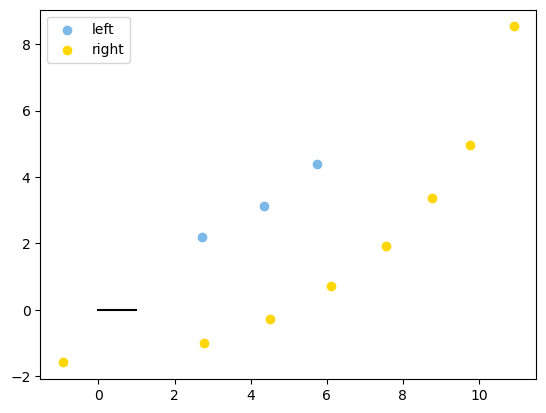

In [4]:
import matplotlib.pyplot as plt

blue_color = "#7CB9E8"
yellow_color = "gold"

plt.scatter(sorted_left[:, 0], sorted_left[:, 1], c=blue_color, label="left")
plt.scatter(sorted_right[:, 0], sorted_right[:, 1], c=yellow_color, label="right")
plt.legend()
plt.plot(
    [car_position[0], car_position[0] + car_direction[0]],
    [car_position[1], car_position[1] + car_direction[1]],
    c="k",
)

In [5]:
from cone_matching.core_cone_matching import ConeMatching, ConeMatchingInput

In [6]:
matched_cones_input = [np.zeros((0, 2)) for _ in ConeTypes]
matched_cones_input[ConeTypes.LEFT] = sorted_left
matched_cones_input[ConeTypes.RIGHT] = sorted_right

cone_matching_input = ConeMatchingInput(
    matched_cones_input,car_position,car_direction
)
cone_matching = ConeMatching(minTrackWidth=3, maxSearchAngle=np.pi/2, maxSearchRange=5, matchesShouldBeMonotonic=False)
cone_matching.setNewInput(cone_matching_input)
(
    left_cones_with_virtual,
    right_cones_with_virtual,
    left_to_right_match,
    right_to_left_match,
) = cone_matching.runConeMatching()

(-2.022486268694462,
 11.531233561794119,
 -2.138594746695628,
 10.016226396210651)

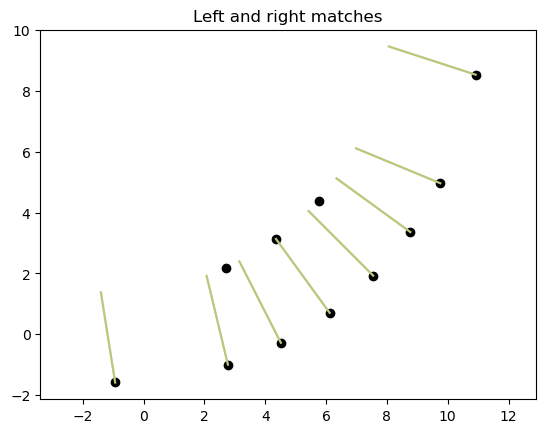

In [7]:
all_cones = np.row_stack([sorted_left, sorted_right])
plt.plot(*all_cones.T, "o", c="k")


for left, right_idx in zip(left_cones_with_virtual, left_to_right_match):
    plt.plot(
        [left[0], right_cones_with_virtual[right_idx][0]],
        [left[1], right_cones_with_virtual[right_idx][1]],
        "-",
        c=blue_color,
    )


for right, left_idx in zip(right_cones_with_virtual, right_to_left_match):
    plt.plot(
        [right[0], left_cones_with_virtual[left_idx][0]],
        [right[1], left_cones_with_virtual[left_idx][1]],
        "-",
        c=yellow_color,
        alpha=0.5,
    )

plt.title("Left and right matches")
plt.axis("equal")

In [8]:
from calculate_path.core_calculate_path import CalculatePath, PathCalculationInput


In [9]:
path_calculation_input = PathCalculationInput(
    left_cones_with_virtual,
    right_cones_with_virtual,
    left_to_right_match,
    right_to_left_match,
    car_position,
    car_direction,
    None,
)
calculate_path = CalculatePath(10,20,40)
calculate_path.setNewInput(path_calculation_input)
result = calculate_path.runPathCalculation()
print(result)

(13, 2)
[[-1.1717564  -0.10457037]
 [ 2.42093119  0.45977381]
 [ 3.82979555  1.05832862]
 [ 5.23464045  1.91921868]
 [ 6.4875165   2.98927592]
 [ 7.55757374  4.24215197]
 [ 8.36915429  5.54003628]
 [ 9.48857061  9.00020903]
 [10.16714249  9.01058825]
 [10.84365517  9.06442239]
 [11.51532872  9.16149023]
 [12.17940308  9.30139292]
 [12.83314944  9.48355554]]


[[-1.1717564  -0.10457037]
 [ 2.42093119  0.45977381]
 [ 3.82979555  1.05832862]
 [ 5.23464045  1.91921868]
 [ 6.4875165   2.98927592]
 [ 7.55757374  4.24215197]
 [ 8.36915429  5.54003628]
 [ 9.48857061  9.00020903]
 [10.16714249  9.01058825]
 [10.84365517  9.06442239]]


(-2.022486268694462,
 11.531233561794119,
 -2.138594746695628,
 10.016226396210651)

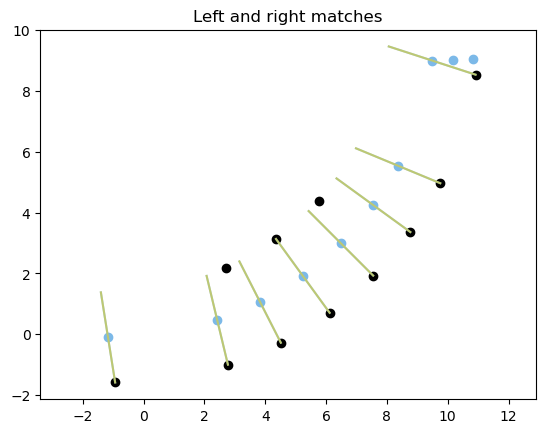

In [10]:

plt.plot(*all_cones.T, "o", c="k")
for left, right_idx in zip(left_cones_with_virtual, left_to_right_match):
    plt.plot(
        [left[0], right_cones_with_virtual[right_idx][0]],
        [left[1], right_cones_with_virtual[right_idx][1]],
        "-",
        c=blue_color,
    )


for right, left_idx in zip(right_cones_with_virtual, right_to_left_match):
    plt.plot(
        [right[0], left_cones_with_virtual[left_idx][0]],
        [right[1], left_cones_with_virtual[left_idx][1]],
        "-",
        c=yellow_color,
        alpha=0.5,
    )

plt.scatter(result[:10,0], result[:10,1], c=blue_color)
print(result[:10])
plt.title("Left and right matches")
plt.axis("equal")